In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

In [70]:
# 数据文件路径
parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..\\.."))
dataset_csv = "0004-B19-atbc.csv" # 只需修改名称，即可查看任意数据
dataset_name = "血培养集-阳_all"
dir_path = os.path.join(parent_dir, "微生物血培养数据报阳报阴分析", dataset_name)
data_file = os.path.join(dir_path, dataset_csv)
# 读取数据集
data = pd.read_csv(data_file, encoding='gbk', header=0, usecols=[0, 1])
data

,采样时间(小时),反射率
0,0.1667,15.32
1,0.3333,15.35
2,0.5000,15.37
3,0.6667,15.39
4,0.8333,15.40
...,...,...
392,67.4406,34.27
393,67.6072,34.27
394,67.7739,34.27
395,67.9406,34.27


Text(0, 0.5, '反射率')

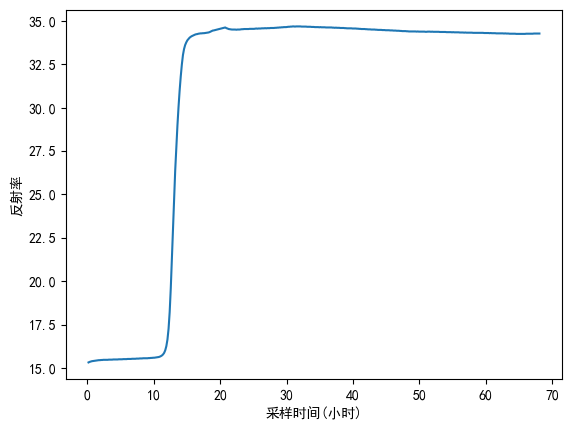

In [52]:
# 设置字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 绘制每条数据的生长曲线
plt.plot(data['采样时间(小时)'], data['反射率'])
plt.xlabel('采样时间(小时)')
plt.ylabel('反射率')


这是一条阳性数据


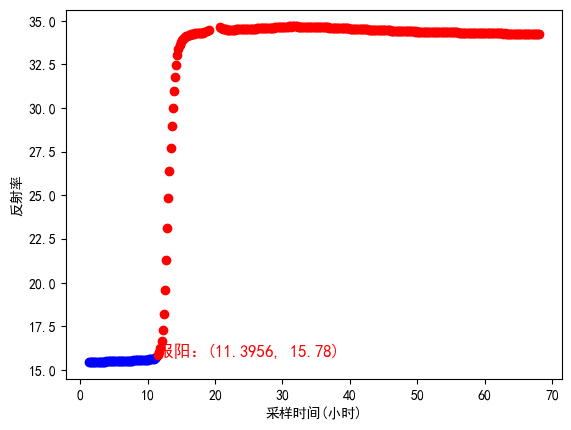

In [56]:
window_size = 6  # 窗口大小
is_positive = False  # 是否为阳性特征
for i in range(6, len(data)):
    if is_positive == True:
        plt.scatter(data.iloc[i, 0], data.iloc[i, 1], c='r', marker='o')  # 标记阳性特征的起始点
        continue
    window = data.iloc[i-window_size:i+1, 1]  # 取出时间窗口
    diff1 = np.gradient(window)  # 计算一阶导数
    diff2 = np.gradient(diff1)  # 计算二阶导数
    if all(diff1 > 0) and all(diff2 > 0):  # 判断是否为阳性特征
        is_positive = True
        plt.text(data.iloc[i, 0], data.iloc[i, 1], f'报阳：({data.iloc[i, 0]}, {data.iloc[i, 1]})', fontsize=12, color='r')
    else:
        plt.scatter(data.iloc[i, 0], data.iloc[i, 1], c='b', marker='o')  # 使用蓝色点显示阴性数据点
if is_positive:
    print("这是一条阳性数据")
# 显示图形
plt.xlabel('采样时间(小时)')
plt.ylabel('反射率')
plt.show()

In [117]:
"""
    上述内容为单一数据查看
    下面内容为统计真阳、真阴、假阳、假阴的数量以及正确率
"""
import glob

# 查看数据
def View_data(filename):
        data = pd.read_csv(filename, encoding='gbk', header=0, usecols=[0, 1])
        return data

# 判断数据是否为阳性数据
def Is_positive(data):
    window_size = 6 # 窗口大小
    is_positive = False  # 是否为阳性特征
    for i in range(6, len(data)):
        window = data.iloc[i-window_size:i+1, 1]  # 取出时间窗口
        diff1 = np.gradient(window)  # 计算一阶导数
        diff2 = np.gradient(diff1)  # 计算二阶导数
        if all(diff1 > 0) and all(diff2 > 0):  # 判断是否为阳性特征
            is_positive = True
            break
    return is_positive

# 文件列表
def File_list(dir_path):
    # 设置要遍历文件后缀名
    file_pattern = "{}/*.csv".format(dir_path)

    # 使用glob库查找符合条件的文件
    file_list = glob.glob(file_pattern)
    return file_list
        

In [118]:
# 统计真阳、真阴、假阳和假阴的数量
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

In [119]:
# 阳性数据集判定
dataset_name = "血培养集-阳_all"
dir_path = os.path.join(parent_dir, "微生物血培养数据报阳报阴分析", dataset_name)
file_list = File_list(dir_path)
total = len(file_list)
print(total)
for filename in file_list:
    data = View_data(filename)
    if Is_positive(data):
        true_positive += 1
    else:
        false_positive += 1
print(f"真阳数量: {true_positive}")
print(f"假阳数量: {false_positive}")
print(f"正确率: {true_positive / total}")

4689
真阳数量: 4602
假阳数量: 87
正确率: 0.981445937300064


In [120]:
# 阴性数据集判定
dataset_name = "血培养集-阴_all"
dir_path = os.path.join(parent_dir, "微生物血培养数据报阳报阴分析", dataset_name)
file_list = File_list(dir_path)
total = len(file_list)
print(total)
for filename in file_list:
    data = View_data(filename)
    if Is_positive(data):
        false_negative += 1
    else:
        true_negative += 1
print(f"真阴数量: {true_negative}")
print(f"假阴数量: {false_negative}")
print(f"正确率: {true_negative / total}")

2945
真阴数量: 2900
假阴数量: 45
正确率: 0.9847198641765704
